242.26076383
(-0.30889251508843812, 0.0076589750358922867, 3.5967997861749505e-05, 0.28447835755025758, 0.0086786230943522499, 4.9982506875295023e-05)


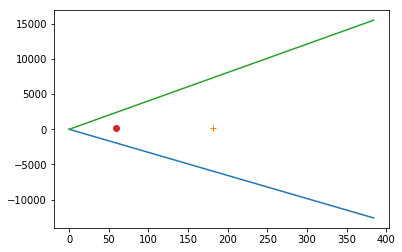

In [50]:
import numpy as np
import math
import matplotlib.pyplot as plt
TL = [[1.1040E-07,2.2954E-05,-4.1584E-03],[1.7160E-05,-1.0348E-06,6.8654E-02],[-3.4505E-03,-7.3661E-02,9.9490E-01]]
#BL = [[-1.0175E-07,2.1155E-05,-4.2910E-03],[1.5815E-05,9.5369E-07,6.2907E-02],[-2.8931E-03,-6.8254E-02,9.9567E-01]]
#BR = [[5.7149E-08,1.1882E-05,-2.4321E-03],[8.8831E-06,-5.3566E-07,-3.8744E-02],[-1.6469E-03,3.3774E-02,9.9867E-01]]
#TR = [[-5.7704E-08,1.1998E-05,-2.1514E-03],[8.9694E-06,5.4087E-07,-3.9328E-02],[-1.7813E-03,3.3894E-02,9.9865E-01]]
#Cen = [[1.0892E-06,-2.2646E-04,2.6635E-03],[-1.6930E-04,-1.0209E-05,-7.0788E-01],[-1.3269E-03,6.8521E-01,1.7139E-01]]
#Python uses Top Left corrdinate.
MatrixL0 = np.array(TL)
#MatrixL = np.array([[5.7225E-08,1.1898E-05,-2.4353E-03],[8.8949E-06,-5.3637E-07,-3.8796E-02],[-1.6491E-03,3.3819E-02,1.0000E+0]])
MatrixR0 = MatrixL0.transpose()
offset = np.zeros((3,1))
MatrixL = np.append(MatrixL0, offset, axis=1)
MatrixR = np.append(MatrixR0, offset, axis=1)
Pl0 = [181.544,211.678] # point in the left
Pr0 = [59.61,211.61] # point in the right
def distance_sum(MatrixL, MatrixR, Pl, Pr):
    X1 = Pl[0]
    Y1 = Pl[1]
    X2 = Pr[0]
    Y2 = Pr[1]
    a11 = MatrixL[0][0]
    a12 = MatrixL[0][1]
    a13 = MatrixL[0][2]
    a14 = MatrixL[0][3]
    a21 = MatrixL[1][0]
    a22 = MatrixL[1][1]
    a23 = MatrixL[1][2]
    a24 = MatrixL[1][3]
    a31 = MatrixL[2][0]
    a32 = MatrixL[2][1]
    a33 = MatrixL[2][2]
    a34 = MatrixL[2][3]
    b11 = MatrixR[0][0]
    b12 = MatrixR[0][1]
    b13 = MatrixR[0][2]
    b14 = MatrixR[0][3]
    b21 = MatrixR[1][0]
    b22 = MatrixR[1][1]
    b23 = MatrixR[1][2]
    b24 = MatrixR[1][3]
    b31 = MatrixR[2][0]
    b32 = MatrixR[2][1]
    b33 = MatrixR[2][2]
    b34 = MatrixR[2][3]
    W1 = a11-a31*X1
    W2 = a12-a32*X1
    W3 = a13-a33*X1
    W4 = X1-a14
    W5 = a21-a31*Y1
    W6 = a22-a32*Y1
    W7 = a23-a33*Y1
    W8 = Y1-a24
    W9 = b11-b31*X2
    W10 = b12-b32*X2
    W11 = b13-b33*X2
    W12 = X2-b14
    W13 = b21-b31*Y2
    W14 = b22-b32*Y2
    W15 = b23-b33*Y2
    W16 = Y2-b24
    W17 = (W1*W7-W3*W5)/(W2*W5-W1*W6)
    W18 = (W4*W5-W1*W8)/(W2*W5-W1*W6)
    W19 = (W2*W7-W3*W6)/(W1*W6-W2*W5)
    W20 = (W4*W6-W2*W8)/(W1*W6-W2*W5)
    W21 = (W9*W15-W11*W13)/(W10*W13-W9*W14)
    W22 = (W12*W13-W9*W16)/(W10*W13-W9*W14)
    W23 = (W10*W15-W11*W14)/(W9*W14-W10*W13)
    W24 = (W12*W14-W10*W16)/(W9*W14-W10*W13)
    PL = (1+b31*W20+b32*W18)
    QL = (b14+b11*W20+b12*W18)
    RL = (b33+b31*W19+b32*W17)
    SL = (b23+b21*W19+b22*W17)
    TL = (b24+b21*W20+b22*W18)
    UL = (b13+b11*W19+b12*W17)
    PR = (1+a31*W24+a32*W22)
    QR = (a14+a11*W24+a12*W22)
    RR = (a33+a31*W23+a32*W21)
    SR = (a23+a21*W23+a22*W21)
    TR = (a24+a21*W24+a22*W22)
    UR = (a13+a11*W23+a12*W21)
    
    Pi = PL*SL-TL*RL # The epipolar line in the right frame, corresponding to the Pl0 in the left frame
    Qi = -PL*UL+QL*RL # Pi*X2+Qi*Y2+Ri = 0 (if Pr0 is on the line)
    Ri = TL*UL-QL*SL
    
    Pk = PR*SR-TR*RR # The epipolar line in the left frame, corresponding to the Pr0 in the right frame
    Qk = -PR*UR+QR*RR # Pk*X1+Qk*Y1+Rk = 0 (if Pl0 is on the line)
    Rk = TR*UR-QR*SR 
    dik = math.fabs(Pi*X2+Qi*Y2+Ri)/math.sqrt(Pi*Pi+Qi*Qi)
    dki = math.fabs(Pk*X1+Qk*Y1+Rk)/math.sqrt(Pk*Pk+Qk*Qk)
    FF = dik + dki
    print(FF)
    #return FF
    return Pi,Qi,Ri,Pk,Qk,Rk
Pi,Qi,Ri,Pk,Qk,Rk = distance_sum(MatrixL, MatrixR, Pl0,Pr0)
print(Pi,Qi,Ri,Pk,Qk,Rk)
x = np.linspace(0,384,385) #  linearly spaced numbers
yl = (-Rk-Pk*x)/Qk # line in the left frame
yr = (-Ri-Pi*x)/Qi # line in the right frame
plt.figure()
plt.plot(x,yl)
plt.plot(Pl0[0],Pl0[1],"+")
plt.plot(x,yr)
plt.plot(Pr0[0],Pr0[1],"o")
plt.show()

In [37]:
def get_xyz(MatrixL, MatrixR, Pl, Pr):
    X1 = Pl[0]
    Y1 = Pl[1]
    X2 = Pr[0]
    Y2 = Pr[1]
    a11 = MatrixL[0][0]
    a12 = MatrixL[0][1]
    a13 = MatrixL[0][2]
    a14 = MatrixL[0][3]
    a21 = MatrixL[1][0]
    a22 = MatrixL[1][1]
    a23 = MatrixL[1][2]
    a24 = MatrixL[1][3]
    a31 = MatrixL[2][0]
    a32 = MatrixL[2][1]
    a33 = MatrixL[2][2]
    a34 = MatrixL[2][3]
    b11 = MatrixR[0][0]
    b12 = MatrixR[0][1]
    b13 = MatrixR[0][2]
    b14 = MatrixR[0][3]
    b21 = MatrixR[1][0]
    b22 = MatrixR[1][1]
    b23 = MatrixR[1][2]
    b24 = MatrixR[1][3]
    b31 = MatrixR[2][0]
    b32 = MatrixR[2][1]
    b33 = MatrixR[2][2]
    b34 = MatrixR[2][3]
    W1 = a11-a31*X1
    W2 = a12-a32*X1
    W3 = a13-a33*X1
    W4 = X1-a14
    W5 = a21-a31*Y1
    W6 = a22-a32*Y1
    W7 = a23-a33*Y1
    W8 = Y1-a24
    W9 = b11-b31*X2
    W10 = b12-b32*X2
    W11 = b13-b33*X2
    W12 = X2-b14
    W13 = b21-b31*Y2
    W14 = b22-b32*Y2
    W15 = b23-b33*Y2
    W16 = Y2-b24
    W17 = (W1*W7-W3*W5)/(W2*W5-W1*W6)
    W18 = (W4*W5-W1*W8)/(W2*W5-W1*W6)
    W19 = (W2*W7-W3*W6)/(W1*W6-W2*W5)
    W20 = (W4*W6-W2*W8)/(W1*W6-W2*W5)
    W21 = (W9*W15-W11*W13)/(W10*W13-W9*W14)
    W22 = (W12*W13-W9*W16)/(W10*W13-W9*W14)
    W23 = (W10*W15-W11*W14)/(W9*W14-W10*W13)
    W24 = (W12*W14-W10*W16)/(W9*W14-W10*W13)
    z = (W12-W9*W20-W10*W18)/(W9*W19+W10*W17+W11)
    y = W17*z + W18
    x = W19*z + W20
    z1 = (W4-W1*W24-W2*W22)/(W1*W23+W2*W21+W3)
    y1 = W21*z+W22
    x1 = W23*z+W24
    return x,y,z,x1,y1,z1
x,y,z,x1,y1,z1 = get_xyz(MatrixL, MatrixR, Pl0,Pr0)
print(x,y,z,x1,y1,z1)

(247.18390323617911, 1.2295540049642462, -0.056809887702922002, -230.7419600456945, -27.718739297576601, 0.10484154865619906)
